In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("../DataSet/hiring.csv")
data.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000


In [4]:
data.isnull().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [5]:
data[ ['experience'] ] = data[ ['experience'] ].fillna( 0 )
data[ ['test_score(out of 10)'] ] = data[ ['test_score(out of 10)'] ].fillna( 0 )
print()
print( data[ ['experience'] ] )
print()
print( data[ ['test_score(out of 10)'] ] )


   experience
0         0.0
1         0.0
2         5.0
3         2.0
4         7.0
5         3.0
6        10.0
7        11.0

   test_score(out of 10)
0                    8.0
1                    8.0
2                    6.0
3                   10.0
4                    9.0
5                    7.0
6                    0.0
7                    7.0


In [6]:
data.columns

Index(['experience', 'test_score(out of 10)', 'interview_score(out of 10)',
       'salary($)'],
      dtype='object')

In [7]:
y = data.loc[ :, 'salary($)' ]
x = data.loc[ :, 'experience' : 'interview_score(out of 10)' ]

print(f"Total no. of Rows/data = { len( data.index ) }\n")
print(f"{x}\n")
print(y)

Total no. of Rows/data = 8

   experience  test_score(out of 10)  interview_score(out of 10)
0         0.0                    8.0                           9
1         0.0                    8.0                           6
2         5.0                    6.0                           7
3         2.0                   10.0                          10
4         7.0                    9.0                           6
5         3.0                    7.0                          10
6        10.0                    0.0                           7
7        11.0                    7.0                           8

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary($), dtype: int64


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y )

In [9]:
print( f"len( x_train ) = { len( x_train ) } and len( x_test ) = { len( x_test ) }" )
print( f"len( y_train ) = { len( y_train ) } and len( y_test ) = { len( y_test ) }" )
print( f"12/47 = {12/47}\n" )

print( f"type( x_train ) = { type( x_train ) } and type( x_test ) = { type( x_test ) }" )
print( f"type( y_train ) = { type( y_train ) } and type( y_test ) = { type( y_test ) }" )

print(f"{x_train}\n")
print(f"{x_test}\n")
print(f"{y_train}\n")
print(f"{y_test}")

len( x_train ) = 6 and len( x_test ) = 2
len( y_train ) = 6 and len( y_test ) = 2
12/47 = 0.2553191489361702

type( x_train ) = <class 'pandas.core.frame.DataFrame'> and type( x_test ) = <class 'pandas.core.frame.DataFrame'>
type( y_train ) = <class 'pandas.core.series.Series'> and type( y_test ) = <class 'pandas.core.series.Series'>
   experience  test_score(out of 10)  interview_score(out of 10)
0         0.0                    8.0                           9
1         0.0                    8.0                           6
2         5.0                    6.0                           7
4         7.0                    9.0                           6
5         3.0                    7.0                          10
6        10.0                    0.0                           7

   experience  test_score(out of 10)  interview_score(out of 10)
3         2.0                   10.0                          10
7        11.0                    7.0                           8

0    50000
1

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()

In [12]:
model.fit( x_train, y_train )    #fit can only take int or float as input. It can take String as input.
                                #So, To train our model we will have to give a integer/float allias name to String.
                                #and then, after computation we will again convert our allias to it's corresponding String.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
predicted_value = model.predict( x_test )
intercept = model.intercept_
coef = model.coef_

print(f"predicted_value,\n { predicted_value }\n")
print(f"Intercept = { intercept }\n")
print(f"Co-Efficient = { coef }")

predicted_value,
 [61482.30065083 85121.35562728]

Intercept = 23484.840467749607

Co-Efficient = [3445.12937192 1145.66908302 1965.0510609 ]


In [14]:
#Score,
#Syntax :- model.score( x_test, y-test )

model.score( x_test, y_test )     #To check the accuract of Predicted Value

0.6568667362466121

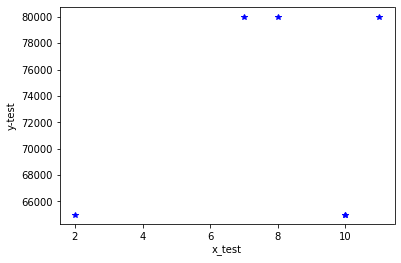

In [15]:
plt.plot( x_test, y_test, marker = "*", color = 'blue', linestyle = '' )
plt.xlabel('x_test')
plt.ylabel('y-test')
plt.show()

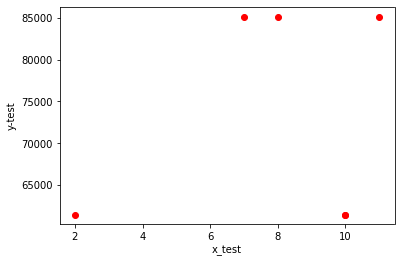

In [16]:
plt.plot( x_test, predicted_value, marker = "o", color = 'red', linestyle = '' )
plt.xlabel('x_test')
plt.ylabel('y-test')
plt.show()

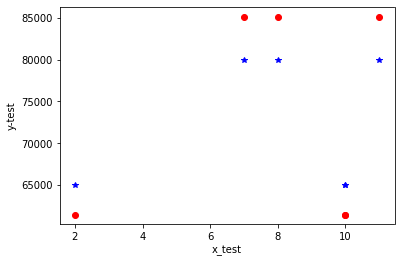

In [17]:
plt.plot( x_test, y_test, marker = "*", color = 'blue', linestyle = '' )
plt.plot( x_test, predicted_value, marker = "o", color = 'red', linestyle = '' )
plt.xlabel('x_test')
plt.ylabel('y-test')
plt.show()